In [1]:
import pandas as pd      #importing dependencies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model

In [2]:
df1 = pd.read_csv(r'C:\Users\lenovo\Downloads\train_data.csv',encoding = "unicode escape")   #loading required datasets
df2 = pd.read_csv(r'C:\Users\lenovo\Downloads\date_to_week_id_map.csv',encoding = "unicode escape")
df3 = pd.read_csv(r'C:\Users\lenovo\Downloads\product_prices.csv',encoding = "unicode escape")

In [3]:
df_productprices = pd.merge(df3,df2,on=['week_id']) # merging dataset based on common column
df_main = pd.merge(df1,df_productprices,on=['outlet','product_identifier','date'])

### BASIC EDA

In [4]:
df_main

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


In [5]:
df = df_main.copy()

In [6]:
def columns_info(df_main):     # Summary of dataset
    colms= []
    dtypes=[]
    unique=[]
    nunique= []
    nulls = []
    
    for colm in df_main.columns:
        colms.append(colm)
        dtypes.append(df_main[colm].dtypes)
        unique.append(df_main[colm].unique())
        nunique.append(df_main[colm].nunique())
        nulls.append(df_main[colm].isna().sum())
        
    return pd.DataFrame ({'columns' :colms,
                            'Datatypes': dtypes,
                            'Unique Values': unique,
                            'No. Of Unique values' : nunique,
                             'Missing values' : nulls})
columns_info(df_main)

,columns,Datatypes,Unique Values,No. Of Unique values,Missing values
0,date,object,"[2012-01-01, 2012-01-02, 2012-01-03, 2012-01-0...",790,0
1,product_identifier,int64,"[74, 337, 423, 432, 581, 611, 631, 659, 743, 7...",50,0
2,department_identifier,int64,"[11, 12, 21, 22, 31, 33]",6,0
3,category_of_product,object,"[others, fast_moving_consumer_goods, drinks_an...",3,0
4,outlet,int64,"[111, 112, 113, 114, 221, 222, 223, 331, 332, ...",10,0
5,state,object,"[Maharashtra, Telangana, Kerala]",3,0
6,sales,int64,"[0, 1, 3, 2, 9, 5, 8, 18, 12, 28, 4, 6, 27, 7,...",126,0
7,week_id,int64,"[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6...",113,0
8,sell_price,float64,"[2.94, 7.44, 0.97, 4.97, 4.88, 2.84, 6.97, 3.9...",107,0


In [7]:
df_main['Month'] = pd.to_datetime(df_main['date']).dt.month #adding a month component using date column

In [8]:
df_main = df_main.drop(columns=["date","week_id"]) #Dropping the unwanted columns
df_main

,product_identifier,department_identifier,category_of_product,outlet,state,sales,sell_price,Month
0,74,11,others,111,Maharashtra,0,2.94,1
1,337,11,others,111,Maharashtra,1,7.44,1
2,423,12,others,111,Maharashtra,0,0.97,1
3,432,12,others,111,Maharashtra,0,4.97,1
4,581,21,fast_moving_consumer_goods,111,Maharashtra,0,4.88,1
...,...,...,...,...,...,...,...,...
394995,2932,33,drinks_and_food,333,Kerala,2,2.78,2
394996,2935,33,drinks_and_food,333,Kerala,8,0.20,2
394997,3004,33,drinks_and_food,333,Kerala,0,2.50,2
394998,3008,33,drinks_and_food,333,Kerala,0,1.98,2


In [9]:
df_main.describe()     #getting statistical values of dataset

,product_identifier,department_identifier,outlet,sales,sell_price,Month
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,4.987644,6.143038
std,809.799518,6.337863,91.161291,3.595266,3.874444,3.576092
min,74.000000,11.000000,111.000000,0.000000,0.050000,1.000000
25%,926.000000,21.000000,113.000000,0.000000,2.680000,3.000000
50%,1325.000000,22.000000,221.500000,0.000000,3.980000,6.000000
75%,1753.000000,31.000000,331.000000,1.000000,6.480000,9.000000
max,3021.000000,33.000000,333.000000,293.000000,44.360000,12.000000


In [10]:
correlation_matrix = df_main.corr()
correlation_matrix

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_964\222542439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_main.corr()


,product_identifier,department_identifier,outlet,sales,sell_price,Month
product_identifier,1.000000e+00,9.099899e-01,2.286007e-17,0.152893,-0.201074,3.090176e-15
department_identifier,9.099899e-01,1.000000e+00,6.817693e-18,0.190038,-0.302860,1.808373e-16
outlet,2.286007e-17,6.817693e-18,1.000000e+00,-0.021005,-0.000140,1.284597e-14
sales,1.528933e-01,1.900381e-01,-2.100456e-02,1.000000,-0.198098,5.262983e-03
sell_price,-2.010739e-01,-3.028601e-01,-1.403172e-04,-0.198098,1.000000,5.675647e-04
Month,3.090176e-15,1.808373e-16,1.284597e-14,0.005263,0.000568,1.000000e+00


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_964\63796267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(df_main.corr(), annot=True,cmap='RdYlGn',square=True)


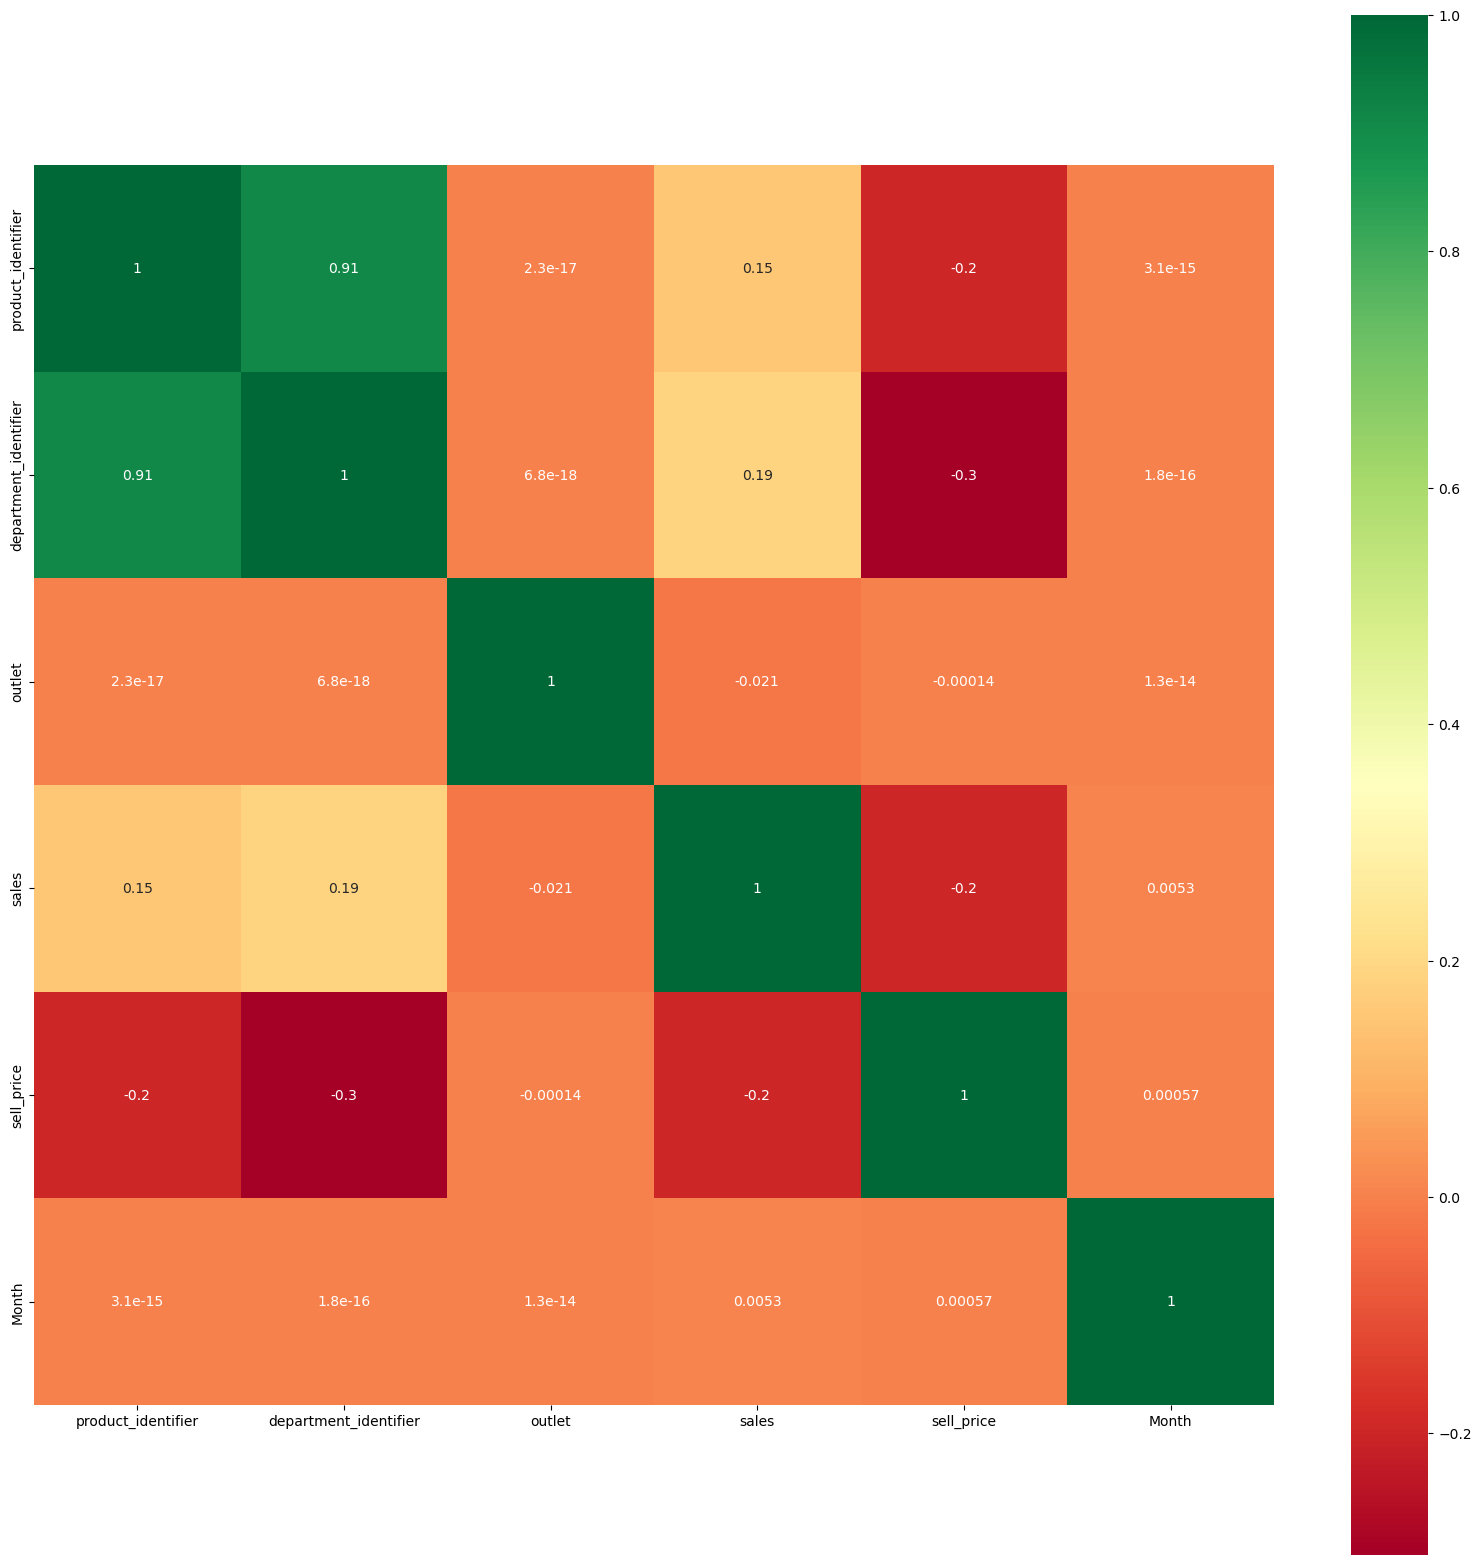

In [11]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(df_main.corr(), annot=True,cmap='RdYlGn',square=True) 

In [12]:
df_main.drop('department_identifier',axis=1,inplace=True)  # droppinh higher co-related column

In [13]:
prefix_col = ['category_of_product', 'state']          #converting categorical values into numericals
dummy_col = ['category_of_product', 'state']
df_main = pd.get_dummies(df_main, prefix = prefix_col, columns = dummy_col)
df_main

,product_identifier,outlet,sales,sell_price,Month,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,state_Kerala,state_Maharashtra,state_Telangana
0,74,111,0,2.94,1,0,0,1,0,1,0
1,337,111,1,7.44,1,0,0,1,0,1,0
2,423,111,0,0.97,1,0,0,1,0,1,0
3,432,111,0,4.97,1,0,0,1,0,1,0
4,581,111,0,4.88,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
394995,2932,333,2,2.78,2,1,0,0,1,0,0
394996,2935,333,8,0.20,2,1,0,0,1,0,0
394997,3004,333,0,2.50,2,1,0,0,1,0,0
394998,3008,333,0,1.98,2,1,0,0,1,0,0


In [14]:
X = df_main.drop(columns= 'sales',axis=1)  #Splitting target & features
Y = df_main['sales']

In [15]:
print(X)

        product_identifier  outlet  sell_price  Month  \
0                       74     111        2.94      1   
1                      337     111        7.44      1   
2                      423     111        0.97      1   
3                      432     111        4.97      1   
4                      581     111        4.88      1   
...                    ...     ...         ...    ...   
394995                2932     333        2.78      2   
394996                2935     333        0.20      2   
394997                3004     333        2.50      2   
394998                3008     333        1.98      2   
394999                3021     333        2.08      2   

        category_of_product_drinks_and_food  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                              

In [16]:
print(Y)

0         0
1         1
2         0
3         0
4         0
         ..
394995    2
394996    8
394997    0
394998    0
394999    0
Name: sales, Length: 395000, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(395000, 10) (276500, 10) (118500, 10)


In [19]:
reg = linear_model.LinearRegression()
ml_model1 = reg.fit(X_train, Y_train)

In [20]:
print ("R^2 is: \n", ml_model1.score(X_train, Y_train))

R^2 is: 
 0.06601050367518246


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
reg2 = DecisionTreeRegressor()
ml_model2 = reg2.fit(X_train, Y_train)

In [23]:
print ("R^2 is: \n", ml_model2.score(X_train, Y_train))

R^2 is: 
 0.4290958264240916


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
reg3 = RandomForestRegressor()
ml_model3 = reg3.fit(X_train, Y_train)

In [26]:
print ("R^2 is: \n", ml_model3.score(X_train, Y_train))

R^2 is: 
 0.42893549567727296


In [27]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [28]:
import xgboost as xgb


In [29]:
reg4 = xgb.XGBRegressor()
ml_model4 = reg4.fit(X_train, Y_train)

In [30]:
print ("R^2 is: \n", ml_model4.score(X_train, Y_train))

R^2 is: 
 0.4175445431250323


### Creating a subset from main dataset to check if r2 score increases

In [31]:
df['date'] = pd.to_datetime(df['date'])
Subset = df[(df['date'].dt.year == 2013)& (df['state'] == 'Maharashtra')]
Subset

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
183000,2013-01-01,74,11,others,111,Maharashtra,0,101,3.43
183001,2013-01-01,337,11,others,111,Maharashtra,3,101,6.98
183002,2013-01-01,423,12,others,111,Maharashtra,0,101,0.97
183003,2013-01-01,432,12,others,111,Maharashtra,0,101,4.97
183004,2013-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,1,101,4.88
...,...,...,...,...,...,...,...,...,...
365195,2013-12-31,2932,33,drinks_and_food,114,Maharashtra,2,153,2.78
365196,2013-12-31,2935,33,drinks_and_food,114,Maharashtra,4,153,0.20
365197,2013-12-31,3004,33,drinks_and_food,114,Maharashtra,2,153,2.50
365198,2013-12-31,3008,33,drinks_and_food,114,Maharashtra,0,153,1.98


In [32]:
Subset1 = Subset.copy()

In [33]:
prefix_col = ['category_of_product']
dummy_col = ['category_of_product']
Subset1 = pd.get_dummies(Subset1, prefix = prefix_col, columns = dummy_col)
Subset1

,date,product_identifier,department_identifier,outlet,state,sales,week_id,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others
183000,2013-01-01,74,11,111,Maharashtra,0,101,3.43,0,0,1
183001,2013-01-01,337,11,111,Maharashtra,3,101,6.98,0,0,1
183002,2013-01-01,423,12,111,Maharashtra,0,101,0.97,0,0,1
183003,2013-01-01,432,12,111,Maharashtra,0,101,4.97,0,0,1
183004,2013-01-01,581,21,111,Maharashtra,1,101,4.88,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
365195,2013-12-31,2932,33,114,Maharashtra,2,153,2.78,1,0,0
365196,2013-12-31,2935,33,114,Maharashtra,4,153,0.20,1,0,0
365197,2013-12-31,3004,33,114,Maharashtra,2,153,2.50,1,0,0
365198,2013-12-31,3008,33,114,Maharashtra,0,153,1.98,1,0,0


In [34]:
Subset1['Month'] = pd.to_datetime(Subset1['date']).dt.month #adding a month component using date column
Subset1

,date,product_identifier,department_identifier,outlet,state,sales,week_id,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,Month
183000,2013-01-01,74,11,111,Maharashtra,0,101,3.43,0,0,1,1
183001,2013-01-01,337,11,111,Maharashtra,3,101,6.98,0,0,1,1
183002,2013-01-01,423,12,111,Maharashtra,0,101,0.97,0,0,1,1
183003,2013-01-01,432,12,111,Maharashtra,0,101,4.97,0,0,1,1
183004,2013-01-01,581,21,111,Maharashtra,1,101,4.88,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
365195,2013-12-31,2932,33,114,Maharashtra,2,153,2.78,1,0,0,12
365196,2013-12-31,2935,33,114,Maharashtra,4,153,0.20,1,0,0,12
365197,2013-12-31,3004,33,114,Maharashtra,2,153,2.50,1,0,0,12
365198,2013-12-31,3008,33,114,Maharashtra,0,153,1.98,1,0,0,12


In [35]:
Subset1 = Subset1.drop(columns=["date","week_id","state"]) #Dropping the unwanted columns
Subset1

,product_identifier,department_identifier,outlet,sales,sell_price,category_of_product_drinks_and_food,category_of_product_fast_moving_consumer_goods,category_of_product_others,Month
183000,74,11,111,0,3.43,0,0,1,1
183001,337,11,111,3,6.98,0,0,1,1
183002,423,12,111,0,0.97,0,0,1,1
183003,432,12,111,0,4.97,0,0,1,1
183004,581,21,111,1,4.88,0,1,0,1
...,...,...,...,...,...,...,...,...,...
365195,2932,33,114,2,2.78,1,0,0,12
365196,2935,33,114,4,0.20,1,0,0,12
365197,3004,33,114,2,2.50,1,0,0,12
365198,3008,33,114,0,1.98,1,0,0,12


In [36]:
X = Subset1.drop(columns= 'sales',axis=1)  #Splitting target & features
Y = Subset1['sales']

In [37]:
print(X)

        product_identifier  department_identifier  outlet  sell_price  \
183000                  74                     11     111        3.43   
183001                 337                     11     111        6.98   
183002                 423                     12     111        0.97   
183003                 432                     12     111        4.97   
183004                 581                     21     111        4.88   
...                    ...                    ...     ...         ...   
365195                2932                     33     114        2.78   
365196                2935                     33     114        0.20   
365197                3004                     33     114        2.50   
365198                3008                     33     114        1.98   
365199                3021                     33     114        2.08   

        category_of_product_drinks_and_food  \
183000                                    0   
183001                       

In [38]:
print(Y)

183000    0
183001    3
183002    0
183003    0
183004    1
         ..
365195    2
365196    4
365197    2
365198    0
365199    0
Name: sales, Length: 73000, dtype: int64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(73000, 8) (51100, 8) (21900, 8)


In [41]:
reg5 = linear_model.LinearRegression()
ml_model5 = reg5.fit(X_train, Y_train)

In [42]:
print ("R^2 is: \n", ml_model5.score(X_train, Y_train))

R^2 is: 
 0.08579840819308904


In [43]:
reg6 = RandomForestRegressor()
ml_model6 = reg6.fit(X_train, Y_train)

In [44]:
print ("R^2 is: \n", ml_model6.score(X_train, Y_train))

R^2 is: 
 0.5473490362132806
